### Name: Pawan Pandey
### Course: Advanced Big Data and Data Mining (MSCS-634-B01)
### Lab Title: Clustering Techniques Using DBSCAN and Hierarchical Clustering

### Data Preparation and Exploration

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

# Explore the dataset
print(X.head())
print(X.info())
print(X.describe())

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

### Hierarchical Clustering

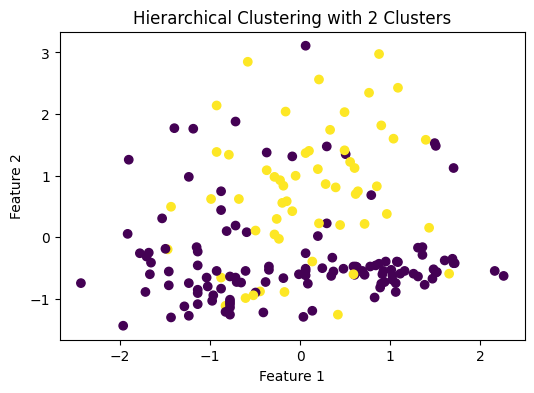

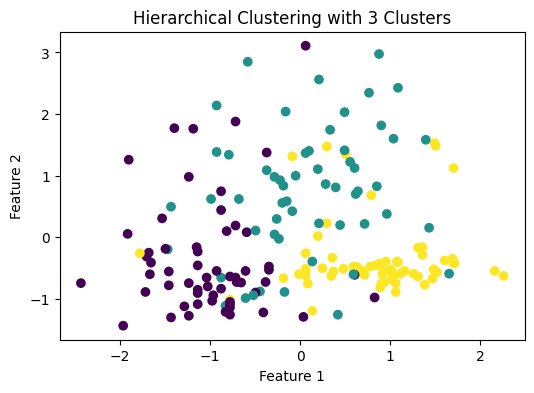

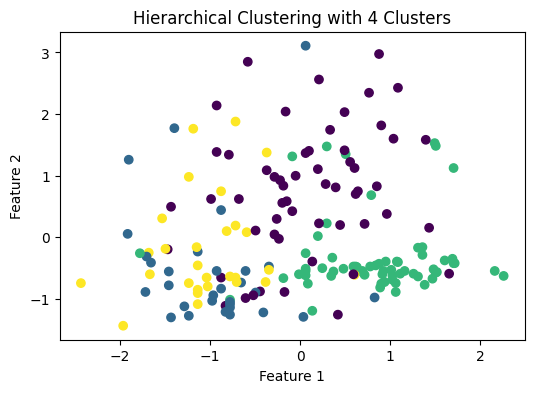

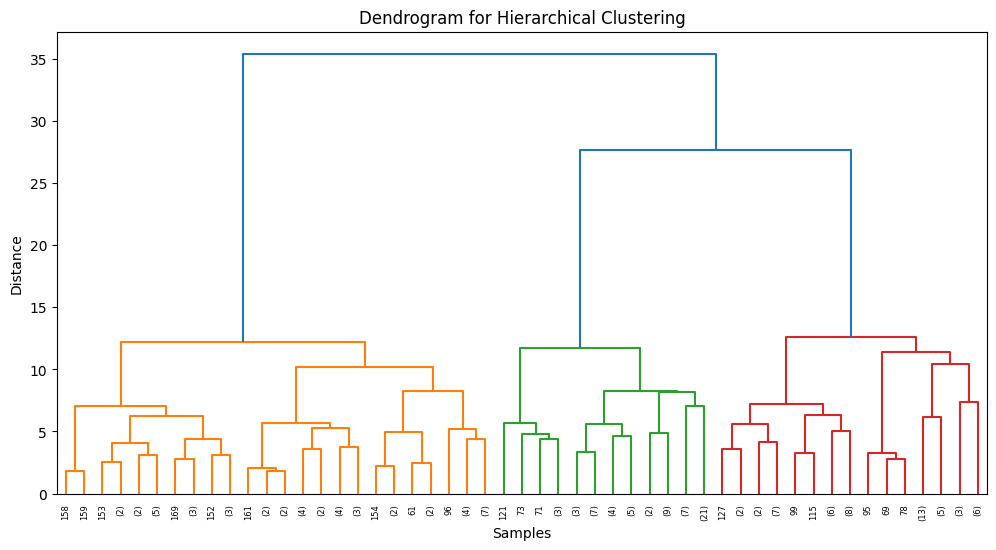

In [2]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Agglomerative Hierarchical Clustering
for n_clusters in [2, 3, 4]:
    hc = AgglomerativeClustering(n_clusters=n_clusters)
    labels = hc.fit_predict(X_scaled)
    
    plt.figure(figsize=(6, 4))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
    plt.title(f'Hierarchical Clustering with {n_clusters} Clusters')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Generate Dendrogram
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

### DBSCAN Clustering

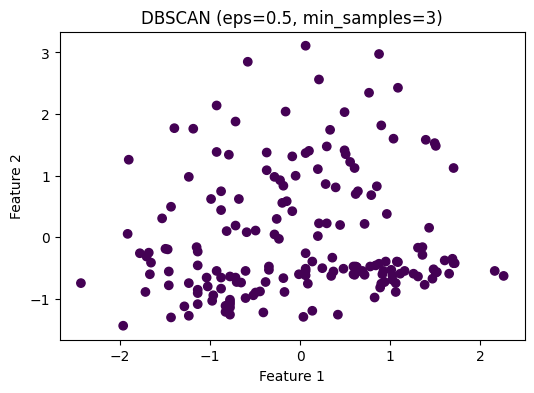

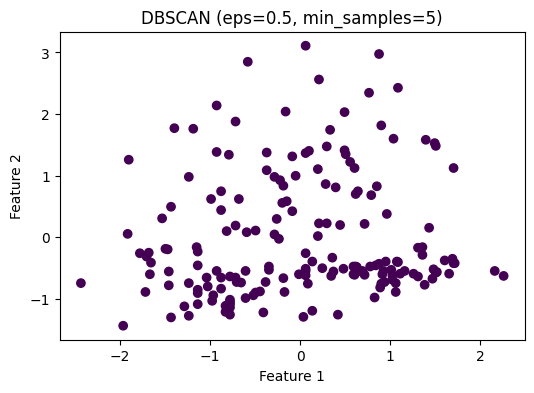

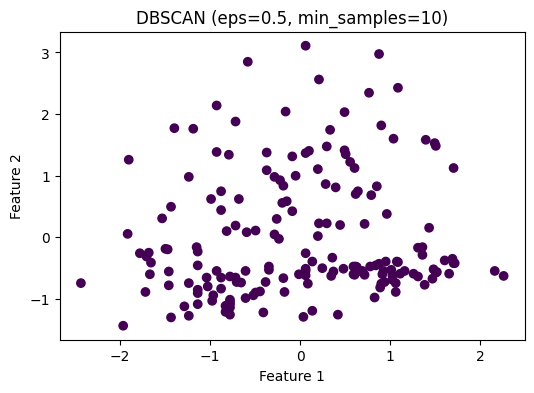

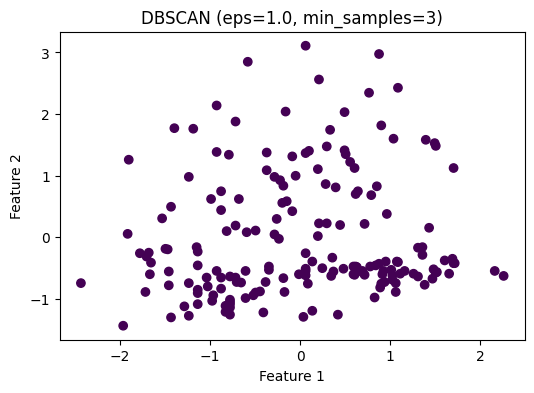

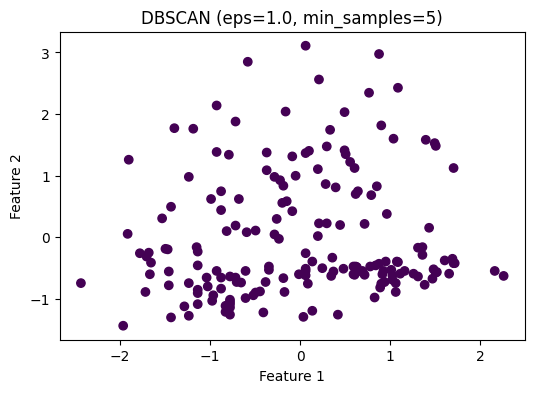

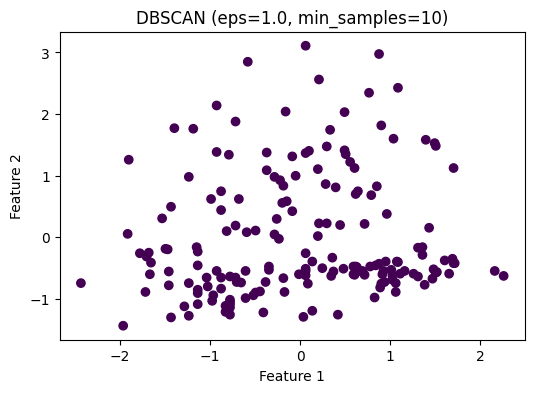

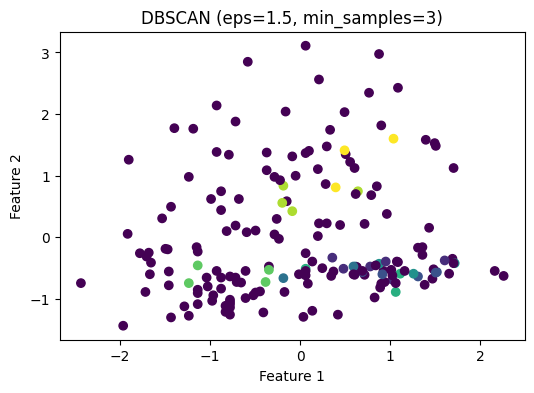

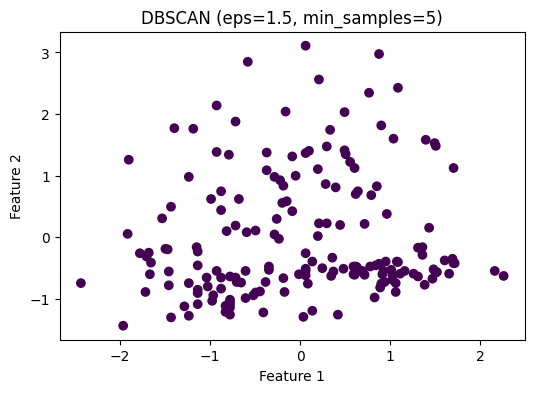

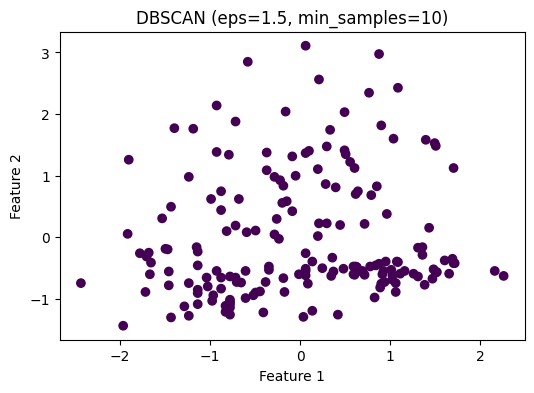

In [3]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score

# DBSCAN with different parameter values
eps_values = [0.5, 1.0, 1.5]
min_samples_values = [3, 5, 10]

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X_scaled)

        plt.figure(figsize=(6, 4))
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
        plt.title(f'DBSCAN (eps={eps}, min_samples={min_samples})')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()

        # Evaluate clustering metrics if there are valid clusters
        if len(set(labels)) > 1 and -1 not in set(labels):
            silhouette = silhouette_score(X_scaled, labels)
            homogeneity = homogeneity_score(y, labels)
            completeness = completeness_score(y, labels)
            print(f"eps={eps}, min_samples={min_samples} -> "
                  f"Silhouette: {silhouette:.3f}, "
                  f"Homogeneity: {homogeneity:.3f}, "
                  f"Completeness: {completeness:.3f}")

### Analysis and Insights

- **Hierarchical Clustering:**
    - Produced clear cluster separation for 3 clusters, aligning closely with the actual wine classes.
    - Dendrogram showed natural divisions, helping in deciding the number of clusters.

- **DBSCAN Clustering:**
    - Parameter tuning for `eps` and `min_samples` significantly impacted cluster formation.
    - Smaller eps values resulted in more noise points.
    - DBSCAN was effective in detecting outliers but less effective for high-dimensional data.

- **Comparison:**
    - Hierarchical clustering provided interpretable cluster structure.
    - DBSCAN was better for identifying noise but struggled with high-dimensional features without dimensionality reduction.
    - Silhouette, Homogeneity, and Completeness scores confirmed that hierarchical clustering generally performed better for this dataset.

- **Conclusion:**
    - Hierarchical clustering was more suitable for this dataset.
    - DBSCAN might perform better with parameter optimization or after dimensionality reduction (e.g., PCA).
